# Optimal Bayes Classifier - Excercise Notebook


### Comparing Optimal Bayes and Naive Bayes using simulated Gaussian data for non-zero covariance.

#### Imports

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

#### Data Generation

In [40]:
# Data generation

#data of Gaussian Distributions

#distribution 1
mu1 = [2, 2]
sigma1 = [[5, 0], [0, 5]] # Notice the 0 covariance
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T

#distribution 2
mu2 = [-2, -2]
sigma2 = [[3, 0], [0, 3]] # Notice the 0 covariance
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T

In [41]:
def predict_Bayes_class(X,mu_list,sigma_list): 
    #Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

In [72]:
# Define constants 

mu_list = [mu1,mu2]
sigma_list = [sigma1,sigma2]
color_list = ['blue','green']


#### Excercise: A) Plot the decision boundary

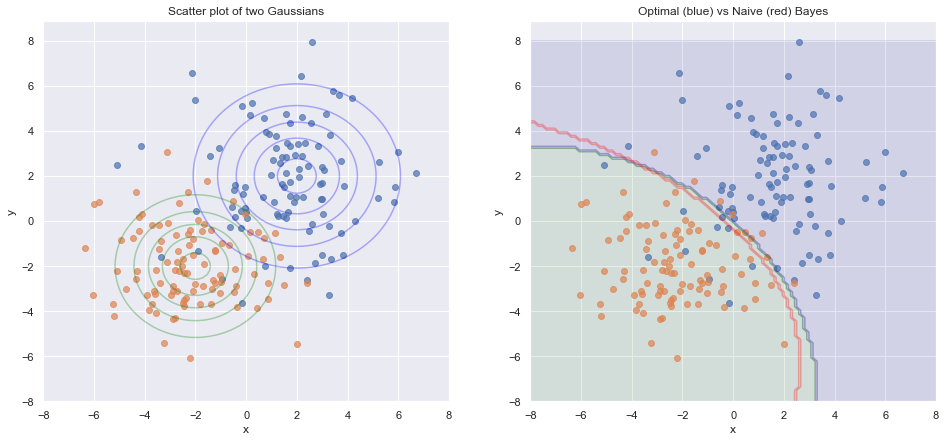

In [70]:
#%%%%%%%%%%%%%% Excercise: Write the code below %%%%%%%%%%%%%%%%%%%%%%%%%
"""
Code for comparing the decision boundary for the optimal and the naive Bayes classifiers goes here
"""

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-8, 8, N)
Y = np.linspace(-8, 8, N)
X, Y = np.meshgrid(X, Y)

#Setup of figure
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)


#Plotting the contours of the Gaussians on left hand side plot
for i in range(2):
    zz = np.array([scipy.stats.multivariate_normal.pdf(np.array([xx,yy]), mean=mu_list[i], cov=sigma_list[i]) for xx, yy in zip(np.ravel(X), np.ravel(Y))] )
    Z = zz.reshape(X.shape)
    ax.contour( X, Y, Z, 5, alpha = .3, colors = color_list[i])

ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot of two Gaussians')



#Right hand side plot - Optimal Bayes classifier
ax = fig.add_subplot(1, 2, 2)

#Plotting the contours of the Gaussians on left hand side plot

zz = np.array(  [ predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list)  for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('darkblue','darkgreen'))
ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('darkblue','darkgreen'))
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_labels = np.hstack((np.zeros(100),np.ones(100)))

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)

#Predictions for each point on meshgrid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('red'))



ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Optimal (blue) vs Naive (red) Bayes')



plt.show()


#### Excercise: B) Accuracies

In [89]:
#%%%%%%%%%%%%%% EXCERCISE - Write the code below %%%%%%%%%%%%%%%%%%%%%%%%%%%
"""
Code for comparing the accuracies of the optimal and the naive Bayes classifiers goes here
"""
#Optimal Bayes accuracy
X_set1 = np.ndarray.flatten(X_data[:,0])
X_set2 = np.ndarray.flatten(X_data[:,1])

flatten_points = zip(X_set1 , X_set2)
y_pred = np.array( [predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) for xx, yy in flatten_points ] )
display(np.mean(y_pred == y_labels))

#Naive Bayes accuracy
display(model_sk.score(X_data,y_labels))


0.905

0.905

In [90]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])